# Spotify Data Analyis

In this project we'll do some analysis of music data.

First we want to see how songs that hit number one climb the charts

Then we want to see how the number of streams of these songs correlate to different features.

In [1]:
import pandas as pd
import datetime as dt
import numpy as np

c=pd.read_csv('../../datasets/spotify/spotify-top-200-global.csv')

In [2]:
c.shape

(44200, 12)

In [4]:
c.head()

,Rank,Track,Artist,Streams,Link,Week,Album_Name,Duration_MS,Explicit,Track_Number_on_Album,Artist_Followers,Artist_Genres
0,1,Starboy,The Weeknd,25734078,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-06,Starboy,230453,True,1,31348348,"['canadian contemporary r&b', 'canadian pop', ..."
1,2,Closer,The Chainsmokers,23519705,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-06,Closer,244960,False,1,17742887,"['dance pop', 'edm', 'electropop', 'pop', 'pop..."
2,3,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,21216399,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-06,Rockabye (feat. Sean Paul & Anne-Marie),251088,False,1,4296325,"['dance pop', 'edm', 'pop', 'pop dance', 'post..."
3,4,Let Me Love You,DJ Snake,19852704,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-06,Encore,205946,False,13,7312319,"['dance pop', 'edm', 'electronic trap', 'pop',..."
4,5,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,18316326,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-06,I Don’t Wanna Live Forever (Fifty Shades Darker),245200,False,1,15423979,"['dance pop', 'pop', 'post-teen pop', 'uk pop']"


In [68]:
c['Week']= pd.to_datetime(c['Week'])
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44200 entries, 0 to 44199
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   44200 non-null  int64         
 1   Track                  44195 non-null  object        
 2   Artist                 44195 non-null  object        
 3   Streams                44200 non-null  int64         
 4   Link                   44200 non-null  object        
 5   Week                   44200 non-null  datetime64[ns]
 6   Album_Name             44195 non-null  object        
 7   Duration_MS            44200 non-null  int64         
 8   Explicit               44200 non-null  bool          
 9   Track_Number_on_Album  44200 non-null  int64         
 10  Artist_Followers       44200 non-null  int64         
 11  Artist_Genres          44200 non-null  object        
 12  id                     44200 non-null  object        
dtypes

Get only the songs that hit number one.

In [3]:
number_one_ranks = c[c.Rank <= 1]

Now get the list of number ones that are unique and get all of the data about these.

How do we get all of the unique elements in a column?

In [4]:
number_one_list = number_one_ranks.Track.unique()
# number_one_list = np.array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
#        'Mi Gente', 'Look What You Made Me Do',
#        'Too Good At Goodbyes - Edit', 'rockstar',
#     'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
#        'Nice For What', 'Better Now', 'This Is America', 'SAD!',
#        'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
#        'I Love It (& Lil Pump)',
#        'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
#        'MIA (feat. Drake)', 'thank u, next',
#        #'All I Want for Christmas Is You',
#        'Sunflower - Spider-Man: Into the Spider-Verse',
#        # '7 rings',
#        'bad guy',
#        "I Don't Care (with Justin Bieber)",
#        # 'Señorita',
#        #'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
#        'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
#        'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
#        'cardigan', 'Savage Love (Laxed - Siren Beat)',
#        'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann dior)',
#        'positions', 'DÁKITI', 'drivers license',
#        'Peaches (feat. Daniel Caesar & Giveon)',
#        'MONTERO (Call Me By Your Name)'
# ])
# number_one_list = np.array([
#        'All I Want for Christmas Is You',
# ])
# number_one_list = np.array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
#        'Mi Gente', 'Look What You Made Me Do',
#        'Too Good At Goodbyes - Edit', 'rockstar',
#        'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
#        'Nice For What', 'Better Now', 'This Is America', 'SAD!',
#        'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
#        'I Love It (& Lil Pump)',
#        'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
#        'MIA (feat. Drake)', 'thank u, next',
#        'All I Want for Christmas Is You',
#        'Sunflower - Spider-Man: Into the Spider-Verse', '7 rings',
#        'bad guy', "I Don't Care (with Justin Bieber)", 'Señorita',
#        'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
#        'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
#        'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
#        'cardigan', 'Savage Love (Laxed - Siren Beat)',
#        'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann dior)',
#        'positions', 'DÁKITI', 'drivers license',
#        'Peaches (feat. Daniel Caesar & Giveon)',
#        'MONTERO (Call Me By Your Name)'])
number_one_list

array(['Starboy', 'Shape of You', 'HUMBLE.', 'Despacito - Remix',
       'Mi Gente', 'Look What You Made Me Do',
       'Too Good At Goodbyes - Edit', 'rockstar',
       'Havana (feat. Young Thug)', "God's Plan", 'Call Out My Name',
       'Nice For What', 'Better Now', 'This Is America', 'SAD!',
       'Nonstop', 'In My Feelings', 'Lucky You (feat. Joyner Lucas)',
       'I Love It (& Lil Pump)',
       'Taki Taki (with Selena Gomez, Ozuna & Cardi B)',
       'MIA (feat. Drake)', 'thank u, next',
       'All I Want for Christmas Is You',
       'Sunflower - Spider-Man: Into the Spider-Verse', '7 rings',
       'bad guy', "I Don't Care (with Justin Bieber)", 'Señorita',
       'Circles', 'HIGHEST IN THE ROOM', 'Dance Monkey',
       'Lose You To Love Me', 'The Box', 'Blinding Lights', 'THE SCOTTS',
       'Rain On Me (with Ariana Grande)', 'ROCKSTAR (feat. Roddy Ricch)',
       'cardigan', 'Savage Love (Laxed - Siren Beat)',
       'WAP (feat. Megan Thee Stallion)', 'Mood (feat. iann d

Now get all of the rows in the data that have that track

In [5]:
number_ones = c.loc[c.Track.isin(number_one_list)]

In [6]:
number_ones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2771 entries, 0 to 44199
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   2771 non-null   int64 
 1   Track                  2771 non-null   object
 2   Artist                 2771 non-null   object
 3   Streams                2771 non-null   int64 
 4   Link                   2771 non-null   object
 5   Week                   2771 non-null   object
 6   Album_Name             2771 non-null   object
 7   Duration_MS            2771 non-null   int64 
 8   Explicit               2771 non-null   bool  
 9   Track_Number_on_Album  2771 non-null   int64 
 10  Artist_Followers       2771 non-null   int64 
 11  Artist_Genres          2771 non-null   object
dtypes: bool(1), int64(5), object(6)
memory usage: 262.5+ KB


In [7]:
number_ones[['Week','Rank', 'Track', 'Streams']]

,Week,Rank,Track,Streams
0,2017-01-06,1,Starboy,25734078
200,2017-01-13,1,Shape of You,51095759
202,2017-01-13,3,Starboy,24261229
400,2017-01-20,1,Shape of You,51021927
403,2017-01-20,4,Starboy,24480907
...,...,...,...,...
44131,2021-04-16,132,Savage Love (Laxed - Siren Beat),6206788
44152,2021-04-16,153,HIGHEST IN THE ROOM,5752842
44153,2021-04-16,154,7 rings,5709792
44159,2021-04-16,160,Rain On Me (with Ariana Grande),5598611


we can now pivot.  Note that we cannot use pivot since it requires all index/column pairs to be unique.
https://pandas.pydata.org/docs/user_guide/reshaping.html
We use pivot_table instead.

In [294]:
streams_by_song = number_ones.pivot_table(index=['Week'], columns='Track',values='Streams')
streams_by_song

Track,7 rings,All I Want for Christmas Is You,Better Now,Blinding Lights,Call Out My Name,Circles,Dance Monkey,Despacito - Remix,DÁKITI,God's Plan,...,The Box,This Is America,Too Good At Goodbyes - Edit,WAP (feat. Megan Thee Stallion),bad guy,cardigan,drivers license,positions,rockstar,"thank u, next"
Week,,,,,,,,,,,,,,,,,,,,,
2017-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19,5629269.0,NaN,NaN,22206539.0,NaN,8106571.0,9233403.0,NaN,21712800.0,NaN,...,6817523.0,NaN,NaN,9555183.0,6903037.0,NaN,31682433.0,12719418.0,NaN,NaN
2021-03-26,5651767.0,NaN,NaN,21727461.0,NaN,8009560.0,9192138.0,NaN,21050177.0,NaN,...,6676728.0,NaN,NaN,9373076.0,6977819.0,NaN,29333748.0,12587726.0,NaN,NaN
2021-04-02,5644122.0,NaN,NaN,21404033.0,NaN,7866868.0,9345558.0,NaN,20641131.0,NaN,...,6752080.0,NaN,NaN,9186724.0,6790925.0,NaN,27143454.0,12105596.0,NaN,NaN


<AxesSubplot:xlabel='Week'>

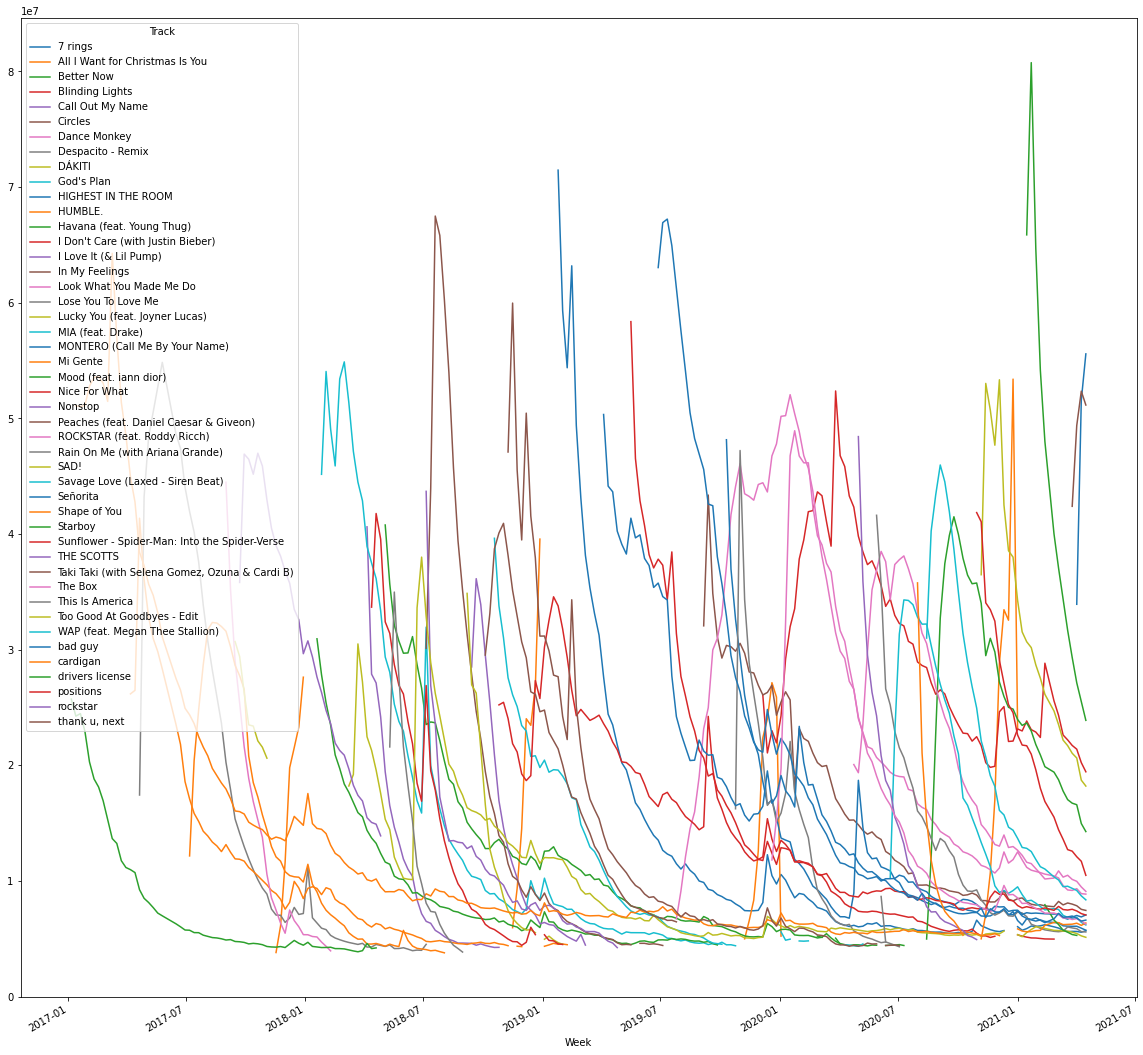

In [295]:
streams_by_song.plot(figsize=(20,20),kind='line')


Lets look at individual songs.

Most songs rise and then fall.  Check out streams of all I want for Christmas!


<AxesSubplot:xlabel='Week'>

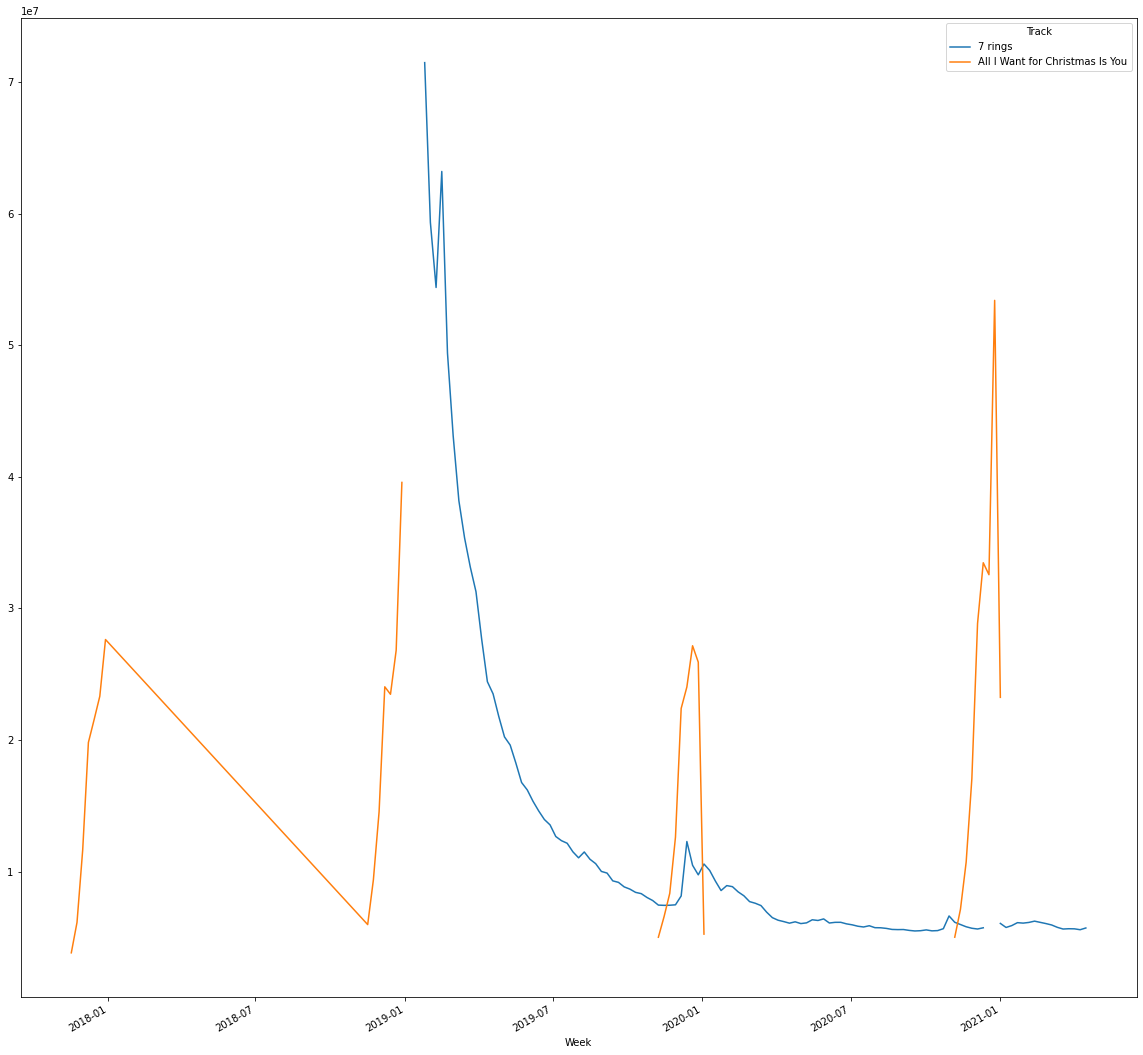

In [69]:
number_ones = c.loc[c.Track.isin(['7 rings', 'All I Want for Christmas Is You'])]
streams_by_song = number_ones.pivot_table(index=['Week'], columns='Track',values='Streams')
streams_by_song.plot(figsize=(20,20),kind='line')

# Audio features of No. 1 songs

Next up:

get audio features for each of the tracks using the API
Get the list of ids from the links

make an API call with the correct credentials
Join it with the table.

First, we'll get the id of each track from the link, and add that to the dataframe

In [50]:
c['id'] = c['Link'].str[len('https://open.spotify.com/track/'):]
track_id=c[['id','Track','Streams']].loc[c['Rank'] == 1]
track_id.set_index('id', inplace=True)

track_id

,Track,Streams
id,,
5aAx2yezTd8zXrkmtKl66Z,Starboy,25734078
7qiZfU4dY1lWllzX7mPBI3,Shape of You,51095759
7qiZfU4dY1lWllzX7mPBI3,Shape of You,51021927
7qiZfU4dY1lWllzX7mPBI3,Shape of You,51124648
7qiZfU4dY1lWllzX7mPBI3,Shape of You,52796064
...,...,...
7lPN2DXiMsVn7XUKtOW1CS,drivers license,31682433
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),42402124
4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),49387249


In [51]:
track_id = track_id.groupby('id').agg({'Track':'first', 'Streams':['sum','count']})

In [52]:
track_id.columns = track_id.columns.map('_'.join)
track_id = track_id.rename(columns={'Track_first':'Track', 'Streams_sum':'Streams','Streams_count':'OnChart'})

Now loop through only the ones that are part of the list

In [48]:
track_id.index

Index(['0TK2YIli7K1leLovkQiNik', '0VjIjW4GlUZAMYd2vXMi3b',
       '0b9oOr2ZgvyQu88wzixux9', '0bAkKNCQfWkexHFn7fIKns',
       '0bYg9bo50gSsH3LtXe2SQn', '0mel2N9Ws9r4yLQn5QE21Y',
       '0nbXyq5TXYPCO7pr3N8S4I', '0sf12qNH5qcw8qpgymFOqD',
       '116H0KvKr2Zl4RPuVBruDO', '14msK75pk3pA33pzPVNtBF',
       '1HfMVBKM75vxSfsQ5VefZ5', '1OmcAT5Y8eg5bUPv9qJT4R',
       '1cTZMwcBJT0Ka3UJPXOeeN', '1gm616Plq4ScqNi7TVkZ5N',
       '1rfofaqEpACxVEHIZBJe6W', '1rgnBhdG2JDFTbYkYRZAku',
       '1xQ6trAsedVPCdbtDAmk0c', '24ySl2hOPGCDcxBxFIqWBu',
       '2Fxmhks0bxGSBdJ92vM42m', '2G7V7zsVDxg1yRsu7Ew9RJ',
       '2Vx8E3K5icPZR7OCklWBXX', '2XW4DbS6NddZxRPm5rMCeY',
       '2rPE9A1vEgShuZxxzR2tZH', '2rb5MvYT7ZIxbKW5hfcHx8',
       '35mvY5S1H3J2QZyna3TFe0', '39Yp9wwQiSRIDOvrVg7mbk',
       '3HVWdVOQ0ZA45FuZGSfvns', '3KkXRkHbMCARz0aVfEt68P',
       '3ee8Jmje8o58CHK66QrVC2', '3eekarcy7kvN4yt5ZFzltW',
       '3tjFYV6RSFtuktYl3ZtYcq', '47EiUVwUp4C9fGccaPuUCS',
       '4MzXwWMhyBbmu6hOcLVD49', '4Oun2ylbjFKMPTiaSbbCih

In [37]:
id_list = ",".join(track_id.index)
id_list

'0TK2YIli7K1leLovkQiNik,0VjIjW4GlUZAMYd2vXMi3b,0b9oOr2ZgvyQu88wzixux9,0bAkKNCQfWkexHFn7fIKns,0bYg9bo50gSsH3LtXe2SQn,0mel2N9Ws9r4yLQn5QE21Y,0nbXyq5TXYPCO7pr3N8S4I,0sf12qNH5qcw8qpgymFOqD,116H0KvKr2Zl4RPuVBruDO,14msK75pk3pA33pzPVNtBF,1HfMVBKM75vxSfsQ5VefZ5,1OmcAT5Y8eg5bUPv9qJT4R,1cTZMwcBJT0Ka3UJPXOeeN,1gm616Plq4ScqNi7TVkZ5N,1rfofaqEpACxVEHIZBJe6W,1rgnBhdG2JDFTbYkYRZAku,1xQ6trAsedVPCdbtDAmk0c,24ySl2hOPGCDcxBxFIqWBu,2Fxmhks0bxGSBdJ92vM42m,2G7V7zsVDxg1yRsu7Ew9RJ,2Vx8E3K5icPZR7OCklWBXX,2XW4DbS6NddZxRPm5rMCeY,2rPE9A1vEgShuZxxzR2tZH,2rb5MvYT7ZIxbKW5hfcHx8,35mvY5S1H3J2QZyna3TFe0,39Yp9wwQiSRIDOvrVg7mbk,3HVWdVOQ0ZA45FuZGSfvns,3KkXRkHbMCARz0aVfEt68P,3ee8Jmje8o58CHK66QrVC2,3eekarcy7kvN4yt5ZFzltW,3tjFYV6RSFtuktYl3ZtYcq,47EiUVwUp4C9fGccaPuUCS,4MzXwWMhyBbmu6hOcLVD49,4Oun2ylbjFKMPTiaSbbCih,4R2kfaDFhslZEMJqAFNpdd,4S8d14HvHb70ImctNgVzQQ,4iJyoBOLtHqaGxP12qzhQI,4w8niZpiMy6qz1mntFA5uM,51MMC5DogGZAnHil5HQAXg,5CtI0qwDJkDQGwXD1H1cLb,5aAx2yezTd8zXrkmtKl66Z,60SdxE8apGAxMiRrpbmLY0,67BtfxlNbhBmCDR2L2l8qd,6ocbgoVGwY

Lets get the features of songs using the api

https://developer.spotify.com/documentation/web-api/reference/#endpoint-get-several-audio-features


curl -X "GET" "https://api.spotify.com/v1/audio-features?ids=4JpKVNYnVcJ8tuMKjAj50A%2C2NRANZE9UCmPAS5XVbXL40%2C24JygzOLM0EmRQeGtFcIcG" -H "Accept: application/json" -H "Content-Type: application/json" -H "Authorization: Bearer XXX"


In [94]:
import requests
import json

url = "https://api.spotify.com/v1/audio-features?ids="+id_list

response = requests.get(url, headers={'Content-Type': 'application/json',
    'Authorization': 'Bearer XXXXX'})
response

<Response [200]>

In [95]:
info = response.text
features = json.loads(info)
features['audio_features'][0]

{'danceability': 0.681,
 'energy': 0.594,
 'key': 7,
 'loudness': -7.028,
 'mode': 1,
 'speechiness': 0.282,
 'acousticness': 0.165,
 'instrumentalness': 3.49e-06,
 'liveness': 0.134,
 'valence': 0.535,
 'tempo': 186.054,
 'type': 'audio_features',
 'id': '5aAx2yezTd8zXrkmtKl66Z',
 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z',
 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z',
 'duration_ms': 230453,
 'time_signature': 4}

In [96]:
import json

# load from file if we can't use the API
with open('../datasets/spotify/no1_features.json', 'w') as f:
    json.dump(features, f)

In [39]:
#from file
import json

with open('../datasets/spotify/no1_features.json', 'r') as file:
    features = json.load(file)
features['audio_features'][0]

{'danceability': 0.681,
 'energy': 0.594,
 'key': 7,
 'loudness': -7.028,
 'mode': 1,
 'speechiness': 0.282,
 'acousticness': 0.165,
 'instrumentalness': 3.49e-06,
 'liveness': 0.134,
 'valence': 0.535,
 'tempo': 186.054,
 'type': 'audio_features',
 'id': '5aAx2yezTd8zXrkmtKl66Z',
 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z',
 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z',
 'duration_ms': 230453,
 'time_signature': 4}

In [40]:
features_df = pd.DataFrame.from_dict(features['audio_features'])
features_df.set_index('id', inplace=True)
features_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 5aAx2yezTd8zXrkmtKl66Z to 67BtfxlNbhBmCDR2L2l8qd
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      46 non-null     float64
 1   energy            46 non-null     float64
 2   key               46 non-null     int64  
 3   loudness          46 non-null     float64
 4   mode              46 non-null     int64  
 5   speechiness       46 non-null     float64
 6   acousticness      46 non-null     float64
 7   instrumentalness  46 non-null     float64
 8   liveness          46 non-null     float64
 9   valence           46 non-null     float64
 10  tempo             46 non-null     float64
 11  type              46 non-null     object 
 12  uri               46 non-null     object 
 13  track_href        46 non-null     object 
 14  analysis_url      46 non-null     object 
 15  duration_ms       46 non-null     int64  
 16  time_signa

join track_id with features

In [53]:
track_features = track_id.join(features_df)
track_features

,Track,Streams,OnChart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,,,,
0TK2YIli7K1leLovkQiNik,Señorita,323383320,5,0.759,0.540,9.0,-6.039,0.0,0.0287,0.037000,0.000000,0.0945,0.7500,116.947,audio_features,spotify:track:0TK2YIli7K1leLovkQiNik,https://api.spotify.com/v1/tracks/0TK2YIli7K1l...,https://api.spotify.com/v1/audio-analysis/0TK2...,190960.0,4.0
0VjIjW4GlUZAMYd2vXMi3b,Blinding Lights,378552988,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0b9oOr2ZgvyQu88wzixux9,This Is America,34989790,1,0.854,0.463,5.0,-6.159,1.0,0.1370,0.117000,0.000000,0.3540,0.5490,120.024,audio_features,spotify:track:0b9oOr2ZgvyQu88wzixux9,https://api.spotify.com/v1/tracks/0b9oOr2ZgvyQ...,https://api.spotify.com/v1/audio-analysis/0b9o...,225773.0,4.0
0bAkKNCQfWkexHFn7fIKns,In My Feelings,111450513,2,0.735,0.482,8.0,-9.445,1.0,0.1390,0.006230,0.014400,0.4480,0.3150,181.995,audio_features,spotify:track:0bAkKNCQfWkexHFn7fIKns,https://api.spotify.com/v1/tracks/0bAkKNCQfWke...,https://api.spotify.com/v1/audio-analysis/0bAk...,217933.0,4.0
0bYg9bo50gSsH3LtXe2SQn,All I Want for Christmas Is You,92968491,2,0.336,0.627,7.0,-7.463,1.0,0.0384,0.164000,0.000000,0.0708,0.3500,150.273,audio_features,spotify:track:0bYg9bo50gSsH3LtXe2SQn,https://api.spotify.com/v1/tracks/0bYg9bo50gSs...,https://api.spotify.com/v1/audio-analysis/0bYg...,241107.0,4.0
0mel2N9Ws9r4yLQn5QE21Y,Too Good At Goodbyes - Edit,30706135,1,0.653,0.378,5.0,-8.273,1.0,0.0533,0.658000,0.000000,0.1770,0.5400,91.835,audio_features,spotify:track:0mel2N9Ws9r4yLQn5QE21Y,https://api.spotify.com/v1/tracks/0mel2N9Ws9r4...,https://api.spotify.com/v1/audio-analysis/0mel...,201000.0,4.0
0nbXyq5TXYPCO7pr3N8S4I,The Box,46164667,1,0.896,0.586,10.0,-6.687,0.0,0.0559,0.104000,0.000000,0.7900,0.6420,116.971,audio_features,spotify:track:0nbXyq5TXYPCO7pr3N8S4I,https://api.spotify.com/v1/tracks/0nbXyq5TXYPC...,https://api.spotify.com/v1/audio-analysis/0nbX...,196653.0,4.0
0sf12qNH5qcw8qpgymFOqD,Blinding Lights,166995506,4,0.513,0.796,1.0,-4.075,1.0,0.0629,0.001470,0.000209,0.0938,0.3450,171.017,audio_features,spotify:track:0sf12qNH5qcw8qpgymFOqD,https://api.spotify.com/v1/tracks/0sf12qNH5qcw...,https://api.spotify.com/v1/audio-analysis/0sf1...,201573.0,4.0
116H0KvKr2Zl4RPuVBruDO,MIA (feat. Drake),39639615,1,0.817,0.539,6.0,-6.349,0.0,0.0621,0.014100,0.000496,0.0990,0.1580,97.062,audio_features,spotify:track:116H0KvKr2Zl4RPuVBruDO,https://api.spotify.com/v1/tracks/116H0KvKr2Zl...,https://api.spotify.com/v1/audio-analysis/116H...,210368.0,4.0


Bar chart of how long on the charts, number of streams

In [1]:
# # Set the width and height of the figure
# plt.figure(figsize=(8, 6))
# # Bar chart showing average score for racing games by platform
# sns.barplot(x=track_features['OnCharts'], y=track_features.index)
# # Add label for horizontal axis
# plt.xlabel("")
# # Add label for vertical axis
# plt.title("XXX")

NameError: name 'plt' is not defined

In [44]:
track_features.columns

Index(['Track_first', 'Streams_sum', 'Streams_count', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'uri',
       'track_href', 'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [56]:
col = ['danceability', 'energy', 'loudness', 
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'Streams', 'OnChart']
corrMatrix = track_features.loc[:,col].corr()
corrMatrix

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Streams,OnChart
danceability,1.000000,-0.071773,0.041378,0.400534,-0.183121,-0.002219,0.068120,0.295382,-0.128693,0.123300,0.126310
energy,-0.071773,1.000000,0.715044,-0.150926,-0.270835,-0.194416,-0.149364,0.413673,0.003046,0.039003,0.081377
loudness,0.041378,0.715044,1.000000,-0.308789,-0.189855,-0.346310,-0.152883,0.441010,-0.053568,0.055316,0.083180
speechiness,0.400534,-0.150926,-0.308789,1.000000,-0.125242,0.411470,-0.118808,0.005464,0.112172,0.007163,0.028867
acousticness,-0.183121,-0.270835,-0.189855,-0.125242,1.000000,0.039175,-0.168974,0.079054,-0.220354,0.331736,0.312086
instrumentalness,-0.002219,-0.194416,-0.346310,0.411470,0.039175,1.000000,-0.067904,0.040113,0.112736,0.061568,0.074771
liveness,0.068120,-0.149364,-0.152883,-0.118808,-0.168974,-0.067904,1.000000,-0.003374,0.029975,-0.101180,-0.118459
valence,0.295382,0.413673,0.441010,0.005464,0.079054,0.040113,-0.003374,1.000000,-0.085550,0.199375,0.199688
tempo,-0.128693,0.003046,-0.053568,0.112172,-0.220354,0.112736,0.029975,-0.085550,1.000000,-0.286456,-0.296061
Streams,0.123300,0.039003,0.055316,0.007163,0.331736,0.061568,-0.101180,0.199375,-0.286456,1.000000,0.983930


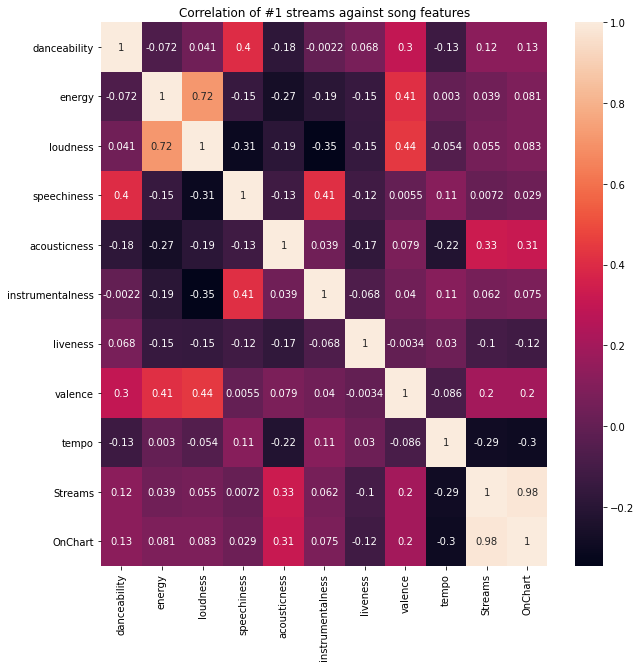

In [59]:
import seaborn as sns #data visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.title("Correlation of #1 streams against song features")
plt.show()

It looks like there might be some relationship between number of streams and acousticness, but it is not significant.

- Instrumentalness: This value represents the amount of vocals in the song. The closer it is to 1.0, the more instrumental the song is.
- Acousticness: This value describes how acoustic a song is. A score of 1.0 means the song is most likely to be an acoustic one.
- Liveness: This value describes the probability that the song was recorded with a live audience. According to the official documentation “a value above 0.8 provides strong likelihood that the track is live”.
- Speechiness: “Speechiness detects the presence of spoken words in a track”. If the speechiness of a song is above 0.66, it is probably made of spoken words, a score between 0.33 and 0.66 is a song that may contain both music and words, and a score below 0.33 means the song does not have any speech.
- Energy: “(energy) represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy”.
- Danceability: “Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable”.
- Valence: “A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)”.

What other questions can we ask about the chart data?

e.g.
https://towardsdatascience.com/is-my-spotify-music-boring-an-analysis-involving-music-data-and-machine-learning-47550ae931de

